#Importing Data

In [3]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from pathlib import Path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/DataMiningProject/Plant_leaf_diseases_dataset.zip"
!unzip "/content/drive/MyDrive/Colab Notebooks/DataMiningProject/test_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1335).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1336).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1337).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1338).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1339).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (134).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1340).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1341).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1342).JPG  
  inflating: Plant_leaf_diseases_dataset/Tomato___Tomato_Ye

In [6]:
data_root = Path('/content/Plant_leaf_diseases_dataset')
print('data_root:', data_root)

print('Number of class:', len(os.listdir("/content/Plant_leaf_diseases_dataset")))
# len(os.listdir("/content/Plant_leaf_diseases_dataset"))

data_root: /content/Plant_leaf_diseases_dataset
Number of class: 38


# Data Preprocessing

In [7]:
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [8]:
Dim = 256 # dimension of the image 
batch_size = 32 #batch size specified to be trained
Num_class = 38 #number of classes of the dataset
default_image_size = tuple((256, 256))

In [9]:
# 0.2 basicallmy means,20 out 100 images will be used for validation and 80 of them will be used for training.
datagen = ImageDataGenerator(zoom_range = 0.5,
                             shear_range=0.3, 
                             horizontal_flip=True, 
                             validation_split = 0.2,
                             preprocessing_function=preprocess_input)

In [10]:
# train_gen and val_gen is a set of images which will be called in later aspect of our code.
train_gen = datagen.flow_from_directory(directory="/content/Plant_leaf_diseases_dataset", 
                                        target_size = (Dim, Dim),
                                        batch_size = 32)

val_gen = datagen.flow_from_directory(directory="/content/Plant_leaf_diseases_dataset", 
                                      target_size = (Dim, Dim), 
                                      batch_size = 32) 

Found 60343 images belonging to 38 classes.
Found 60343 images belonging to 38 classes.


In [11]:
t_img, label = train_gen.next()

t_img.shape, label.shape
#  t_img is a numpy array containing a batch of images and label is a numpy array of corresponding labels
# (batch_size, *target_size, channels)

((32, 256, 256, 3), (32, 38))

In [12]:
def plotImage(img_arr,label):
   for im ,l in zip(img_arr,label):
     plt.figure(figsize=(5,5))
     plt.imshow(im/255)
     plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


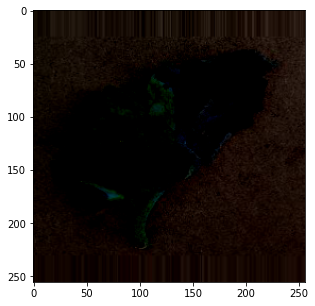

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


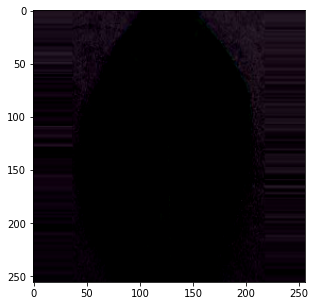

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


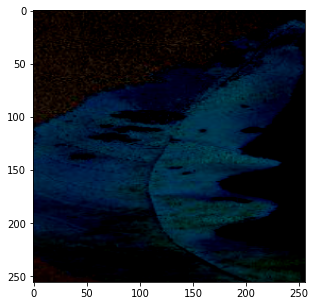

In [13]:
plotImage(t_img[:3],label[:3])

# Building Model

In [14]:
from keras.layers import Dense ,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [15]:
base_model = VGG19(input_shape=(Dim,Dim,3),include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [16]:
for layer in base_model.layers:
  layer.trainable = False

In [17]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
X = Flatten()(base_model.output)
X = Dense(units=38,activation='softmax')(X)


# Creating out model
model = Model(base_model.input, X)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

# Early Stopping and Model Check Point

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

# Model Check point
mc = ModelCheckpoint(filepath="best_model.h5", 
                     monitor='val_accuracy',
                     min_delta=0.01,
                     patience=3,
                     verbose=1,
                     save_best_only=True)
cb = [es,mc]

In [ ]:
his = model.fit_generator(train_gen,
                          steps_per_epoch=16,
                          epochs=50,
                          verbose=1,
                          callbacks=cb,
                          validation_data=val_gen,
                          validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 29.1887 - accuracy: 0.2598 
Epoch 1: val_accuracy improved from -inf to 0.38281, saving model to best_model.h5
16/16 [==============================] - 768s 50s/step - loss: 29.1887 - accuracy: 0.2598 - val_loss: 16.1086 - val_accuracy: 0.3828
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 15.0918 - accuracy: 0.4844 
Epoch 2: val_accuracy improved from 0.38281 to 0.49414, saving model to best_model.h5
16/16 [==============================] - 760s 49s/step - loss: 15.0918 - accuracy: 0.4844 - val_loss: 12.3097 - val_accuracy: 0.4941
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.4654 - accuracy: 0.5879 
Epoch 3: val_accuracy improved from 0.49414 to 0.60938, saving model to best_model.h5
16/16 [==============================] - 761s 49s/step - loss: 10.4654 - accuracy: 0.5879 - val_loss: 10.8259 - val_accuracy: 0.6094
Epoch 4/50
16/16 [==============================] - ETA: 0

# Model Histogram

In [ ]:
h = his.history
h.keys()

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')
plt.title("acc vs v-acc")
plt.show()

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title("loss vs v-loss")
plt.show()

# Result

In [ ]:
# load best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val_gen)[1]

print(f"The accuracy of your model is = {acc*100} %")

# Testing Model

In [ ]:
# train_gen.class_indices
ref = dict(zip( list(train_gen.class_indices.values()), list(train_gen.class_indices.keys()) ))
ref

In [ ]:
def prediction(path):
  
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  # print(im)
  # print(im.shape)

  img = np.expand_dims(im, axis=0)
  # print(img.shape)

  pred = model.predict(img)
  pred = np.argmax(model.predict(img))
  print(pred)

  print(f"The image belongs to { ref[pred] }\n")

In [ ]:
def showImage(path):
  img = mpimg.imread(path)
  imgplot = plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
test_data_root = Path('/content/test_data/')
print('test_data_root:', test_data_root)

In [ ]:
for images in os.listdir(test_data_root):
  showImage('/content/test_data/'+images)
  prediction('/content/test_data/'+images)

In [ ]:
# path = "/content/test/Apple___Cedar_apple_rust.JPG"

# prediction(path)